# Regression on Toy Data

### Load Data

In [3]:
import pandas as pd

In [22]:
data = pd.read_csv('./data/sample.csv', header=0, sep=',', encoding='euc-kr')

In [23]:
data = data[['국어성적', '수학성적']].values

In [24]:
data

array([[20, 55],
       [60, 80],
       [ 0, 50],
       [20, 60],
       [60, 80],
       [30, 65],
       [60, 80],
       [60, 80],
       [10, 55],
       [40, 70],
       [70, 85],
       [10, 55],
       [30, 65],
       [ 0, 50],
       [20, 60],
       [60, 80],
       [90, 95],
       [ 0, 50],
       [ 0, 50],
       [90, 95],
       [10, 55],
       [90, 95],
       [60, 80],
       [10, 55]])

### Split Data: Train data, Validation Data

In [25]:
import numpy as np

In [26]:
train_len = 12
train_idxs = np.random.choice(len(data), train_len, replace=False) #index정의
train_data = data[train_idxs] #위에 csv file의 data에 index형식에 맞게 뽑아 train_data를 선언(12개)  

In [27]:
print(train_data)

[[30 65]
 [ 0 50]
 [60 80]
 [90 95]
 [60 80]
 [20 60]
 [10 55]
 [20 60]
 [10 55]
 [90 95]
 [20 55]
 [40 70]]


In [28]:
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs] #validation Data정의
val_data = data[val_idxs] #validation Data 선언

In [29]:
print(val_data)

[[60 80]
 [ 0 50]
 [60 80]
 [60 80]
 [70 85]
 [10 55]
 [30 65]
 [ 0 50]
 [ 0 50]
 [90 95]
 [10 55]
 [60 80]]


### Set Models

#### Linear Regression

In [30]:
from sklearn.linear_model import LinearRegression

In [31]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE., fit_intercept를 True로 하면 y절편 값을 구하고, False로 하면 그러지 않는다.

#### DecisionTree

In [32]:
from sklearn.tree import DecisionTreeRegressor

In [33]:
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', # v=0.24 {“mse”, “mae”, ...}
                                 splitter='best', # {“best”, “random”}
                                 max_depth=2, #tree의 깊이를 2로 설정
                                 random_state=0) # random state를 '0'으로 설정하여 항상 같 순서의 데이터 사용

### Train and Validate

In [67]:
models = [model_lr, model_dt] #model_lr 과 model_dt를 배열로 담음(models)

In [68]:
def mse_loss(pre, y):                   #mse loss function정의
    return ((pre-y)**2).mean()

#### Train

In [74]:
x = train_data[:, 0:1]   # train data를 리스트x로 저장 [: -> 원소가 0부터 인덱스에 있는 만큼 , 0:1 -> 인덱스 0~1까지 즉 '0'번째 인덱스만큼 열로]
y = train_data[:, 1]     # train data를 리스트y로 저장 [ " , 1 -> '2열'의 데이터]

print(x.shape, y.shape)
x, y

(12, 1) (12,)


(array([[30],
        [ 0],
        [60],
        [90],
        [60],
        [20],
        [10],
        [20],
        [10],
        [90],
        [20],
        [40]]),
 array([65, 50, 80, 95, 80, 60, 55, 60, 55, 95, 55, 70]))

In [71]:
for model in models:
    model.fit(x, y)                    # sklearn의 .fit method를 사용하여 train data로 선언한 x와y를 훈련시킴
    pre = model.predict(x)             # sklearn의 .predict()을 사용하여 훈련에 대한 예측값을 pre에 담음
    
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 1.848521183053557
DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=0) 6.944444444444444


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


#### Validate

In [72]:
x = val_data[:, 0:1]
y = val_data[:, 1]

print(x.shape, y.shape)

(12, 1) (12,)


In [73]:
for model in models:
#     model.fit(x, y)
    pre = model.predict(x)
    
    loss_value = mse_loss(pre, y)
    
    print(model, loss_value)

LinearRegression() 0.24185687421286753
DecisionTreeRegressor(criterion='mse', max_depth=2, random_state=0) 11.22685185185186


#### Explain

In [78]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)  # .coef_ => 기울기 / .intercept_ => 절편

w: [0.50839329] , b: 49.26858513189447


In [79]:
from sklearn.tree import export_graphviz             #의사결정트리를 사용하기 위해 임포트
export_graphviz(model_dt, out_file ='tree.dot')      #model_dt에 의사결정 트리를 사용
# http://webgraphviz.com/

In [80]:
import matplotlib.pyplot as plt     #데이터 시각화 사용
%matplotlib inline

In [85]:
xs = np.arange(0.0, 100.0, 1).reshape(-1, 1) #numpy기반 arange함수를 사용하여 [0.0 에서(개구간) 100.0까지(폐구간) 1의 간격으로 array형태로 반환)
                                            #.reshape를 사용하여 -1을 통해 사이즈를 기반으로 row개수를 정하고, 2를 통해 1차원으로 데이터 나열

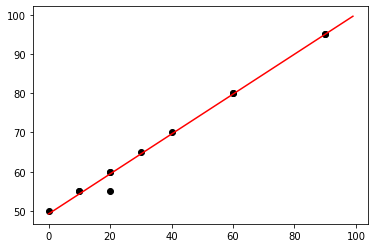

In [82]:
plt.scatter(x, y, c='k')      #산점도 (Scatter plot)는 두 변수의 상관 관계를 직교 좌표계의 평면에 점으로 표현하는 그래프
plt.plot(xs, model_lr.predict(xs), c='r')  #실제로 그래프를 시각화함 (xs와 predict(xs)를 가지고 빨간색 라인으로 그래프를 나타냄)
plt.show()

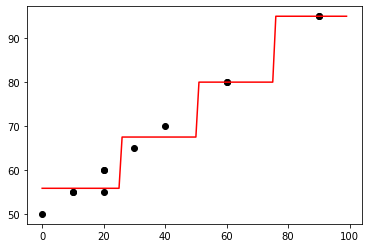

In [83]:
plt.scatter(x, y, c='k')
plt.plot(xs, model_dt.predict(xs), c='r')
plt.show()

### Select Model

In [98]:
model_best = model_lr

# Regression on Real Data

[Load the California housing dataset (regression)](https://scikit-learn.org/stable/modules/generated/sklearn.datasets.fetch_california_housing.html#sklearn.datasets.fetch_california_housing)

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block group
        - HouseAge      median house age in block group
        - AveRooms      average number of rooms per household
        - AveBedrms     average number of bedrooms per household
        - Population    block group population
        - AveOccup      average number of household members
        - Latitude      block group latitude
        - Longitude     block group longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
https://www.dcc.fc.up.pt/~ltorgo/Regression/cal_housing.html

The target variable is the median house value for California districts,
expressed in hundreds of thousands of dollars ($100,000).

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bureau publishes sample data (a block group typically has a population
of 600 to 3,000 people).

An household is a group of people residing within a home. Since the average
number of rooms and bedrooms in this dataset are provided per household, these
columns may take surpinsingly large values for block groups with few households
and many empty houses, such as vacation resorts.

It can be downloaded/loaded using the
:func:`sklearn.datasets.fetch_california_housing` function.

.. topic:: References

    - Pace, R. Kelley and Ronald Barry, Sparse Spatial Autoregressions,
      Statistics and Probability Letters, 33 (1997) 291-297

In [99]:
from sklearn.datasets import fetch_california_housing
california_housing = fetch_california_housing()

In [100]:
x = california_housing.data
y = california_housing.target
x.shape, y.shape

((20640, 8), (20640,))

### Split Data: Train data, Validation Data

In [101]:
import numpy as np

In [102]:
train_len = 5000
train_idxs = np.random.choice(len(x), train_len, replace=False)
train_x = x[train_idxs]
train_y = y[train_idxs]

In [103]:
val_idxs = [idx for idx in range(len(data)) if idx not in train_idxs]
val_x = x[val_idxs]
val_y = y[val_idxs]

### Set Models

#### Linear Regression

In [104]:
from sklearn.linear_model import LinearRegression

In [105]:
model_lr = LinearRegression(fit_intercept=True) # Loss function is fixed to MSE.

#### DecisionTree

In [106]:
from sklearn.tree import DecisionTreeRegressor

In [107]:
#model_dt를 의사결정트리로 만드는 과정(DecisionTreeRegressor=회귀tree / DecisionTreeClassifier=분류tree)
model_dt = DecisionTreeRegressor(#criterion='squared_error', # latest version {“squared_error”, “absolute_error”, ...}
                                 criterion='mse', #Loss function(불순도 측도) v=0.24 {“mse”, “mae”, "entropy", ...}
                                 splitter='best', #분류 방법 {“best”, “random”}
                                 max_depth=10,
                                 random_state=0)

### Train and Validate

In [108]:
models = [model_lr, model_dt]

In [109]:
def mse_loss(pre, y):
    return ((pre-y)**2).mean()

#### Train

In [110]:
for model in models:
    model.fit(train_x, train_y)
    pre = model.predict(train_x)
    
    loss_value = mse_loss(pre, train_y)
    
    print(model, loss_value)

LinearRegression() 0.5091421115634567
DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0) 0.15145315379865906


/Applications/anaconda3/lib/python3.9/site-packages/sklearn/tree/_classes.py:359: FutureWarning: Criterion 'mse' was deprecated in v1.0 and will be removed in version 1.2. Use `criterion='squared_error'` which is equivalent.
  warnings.warn(


#### Validate

In [111]:
for model in models:
#     model.fit(val_x, val_y)
    pre = model.predict(val_x)
    
    loss_value = mse_loss(pre, val_y)
    
    print(model, loss_value)

LinearRegression() 0.1646222023065752
DecisionTreeRegressor(criterion='mse', max_depth=10, random_state=0) 0.5350978036679479


#### Explain

In [112]:
print("w:", model_lr.coef_, ", b:", model_lr.intercept_)

w: [ 4.42891430e-01  8.14188313e-03 -1.25883236e-01  6.70101612e-01
 -6.22537557e-06 -2.76324453e-03 -4.22497964e-01 -4.31661824e-01] , b: -36.4776949296395


In [113]:
from sklearn.tree import export_graphviz 
export_graphviz(model_dt, out_file ='tree.dot')
# http://webgraphviz.com/

### Select Model

In [114]:
model_best = model_dt